In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data=pd.read_csv('tip.csv')


# Undersatnding your data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [19]:
data.shape

(244, 7)

In [22]:
data.sample(5)

,total_bill,tip,sex,smoker,day,time,size
3,23.68,3.31,Male,No,Sun,Dinner,2
209,12.76,2.23,Female,Yes,Sat,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3
81,16.66,3.40,Male,No,Thur,Lunch,2
146,18.64,1.36,Female,No,Thur,Lunch,3


In [24]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [26]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [37]:
data.duplicated().sum()

1

In [38]:
data.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [44]:
data[['total_bill', 'size', 'tip']].corr()['tip']


total_bill    0.675734
size          0.489299
tip           1.000000
Name: tip, dtype: float64

# E.D.A of univariate columns

<Axes: xlabel='sex', ylabel='count'>

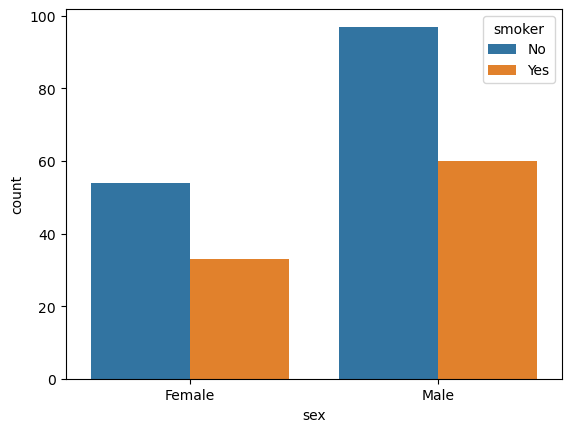

In [48]:
sns.countplot(x='sex',hue='smoker',data=data)

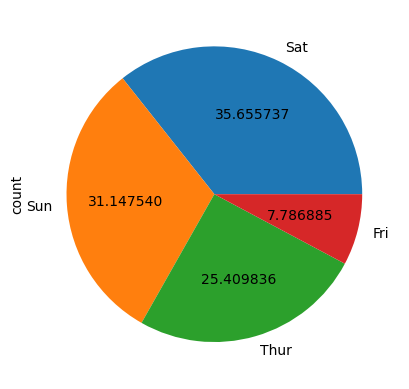

In [66]:
data['day'].value_counts().plot(kind='pie',autopct='%2f')
plt.show()

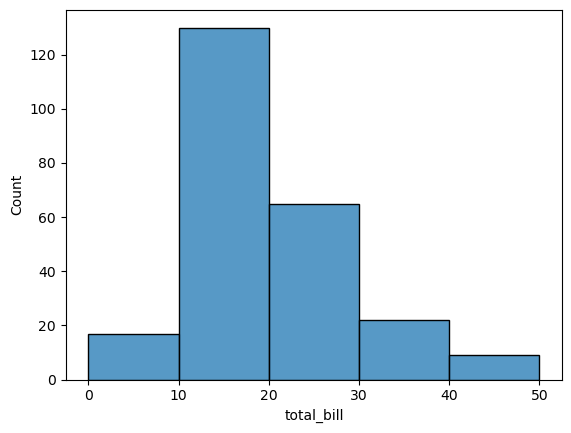

In [65]:
sns.histplot(x='total_bill',bins=[0,10,20,30,40,50],data=data)
plt.show()

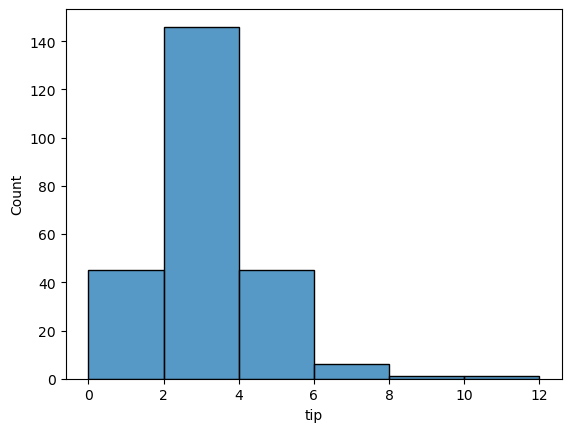

In [70]:
sns.histplot(x='tip',bins=[0,2,4,6,8,10,12],data=data)
plt.show()

<Axes: ylabel='total_bill'>

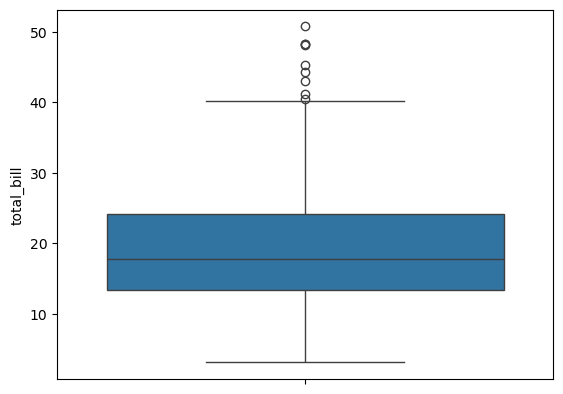

In [178]:
sns.boxplot(y='total_bill',data=data)

# E.D.A on bivariate columns

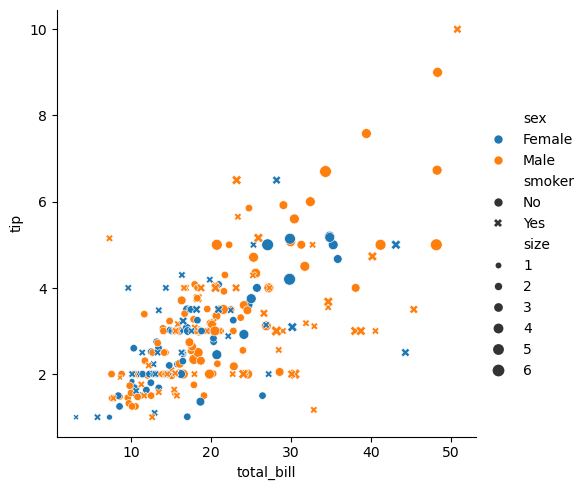

In [81]:
sns.relplot(x='total_bill',y='tip',hue='sex',style='smoker',size='size',data=data)
plt.show()

<Axes: xlabel='day', ylabel='tip'>

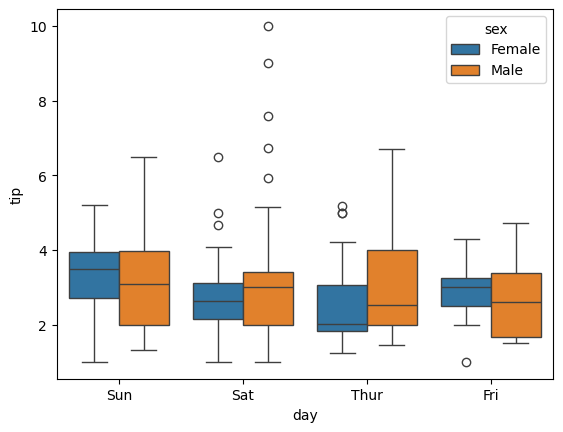

In [87]:
sns.boxplot(x='day',y='tip',hue='sex',data=data)

<Axes: xlabel='time', ylabel='day'>

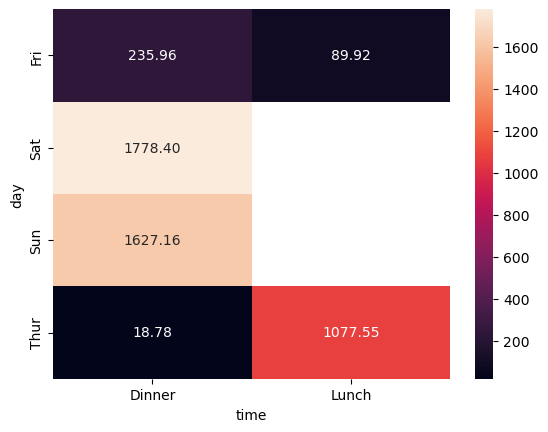

In [98]:
x=data.pivot_table(index='day',columns='time',values='total_bill',aggfunc='sum')
sns.heatmap(x,annot=True,fmt='.2f')

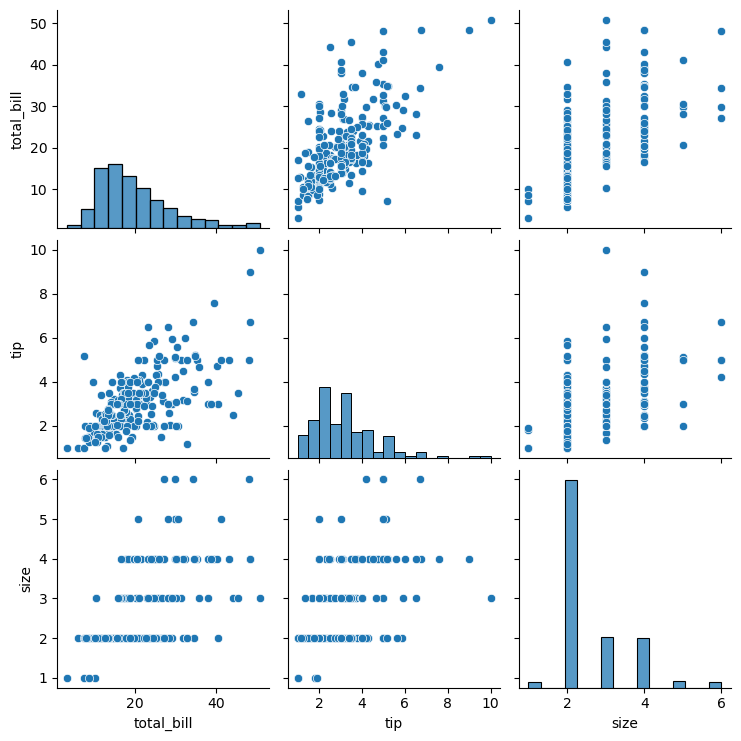

In [101]:
sns.pairplot(data)
plt.show()

# Encoding categorical variables

In [102]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder

In [116]:
OHE=OneHotEncoder(sparse_output=False,drop='first')

In [131]:
OHE.fit(data[['sex','smoker','day','time']])
ohe_data=OHE.transform(data[['sex','smoker','day','time']])
column_names = OHE.get_feature_names_out(['sex', 'smoker', 'day', 'time'])
new_ohe_data=pd.DataFrame(ohe_data,columns=column_names)

In [132]:
new_data=pd.concat([data[['total_bill','tip','size']],new_ohe_data],axis=1)

In [133]:
new_data

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0.0,0.0,0.0,1.0,0.0,0.0
1,10.34,1.66,3,1.0,0.0,0.0,1.0,0.0,0.0
2,21.01,3.50,3,1.0,0.0,0.0,1.0,0.0,0.0
3,23.68,3.31,2,1.0,0.0,0.0,1.0,0.0,0.0
4,24.59,3.61,4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1.0,0.0,1.0,0.0,0.0,0.0
240,27.18,2.00,2,0.0,1.0,1.0,0.0,0.0,0.0
241,22.67,2.00,2,1.0,1.0,1.0,0.0,0.0,0.0
242,17.82,1.75,2,1.0,0.0,1.0,0.0,0.0,0.0


# Train_test_split

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_data.drop('tip',axis=1),new_data['tip'],test_size=0.2)

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
134,18.26,2,0.0,0.0,0.0,0.0,1.0,1.0
105,15.36,2,1.0,1.0,1.0,0.0,0.0,0.0
65,20.08,3,1.0,0.0,1.0,0.0,0.0,0.0
30,9.55,2,1.0,0.0,1.0,0.0,0.0,0.0
200,18.71,3,1.0,1.0,0.0,0.0,1.0,1.0
243,18.78,2,0.0,0.0,0.0,0.0,1.0,0.0
206,26.59,3,1.0,1.0,1.0,0.0,0.0,0.0
121,13.42,2,0.0,0.0,0.0,0.0,1.0,1.0
230,24.01,4,1.0,1.0,1.0,0.0,0.0,0.0
67,3.07,1,0.0,1.0,1.0,0.0,0.0,0.0


# Feature scaling:- Standard Scaler

In [152]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [153]:
scaler.fit(x_train)
train_scaler=scaler.transform(x_train)
test_scaler=scaler.transform(x_test)
new_train=pd.DataFrame(train_scaler,columns=x_train.columns)
new_test=pd.DataFrame(test_scaler,columns=x_test.columns)

# Model Training

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
model=LinearRegression()
model.fit(new_train,y_train)

LinearRegression()

In [168]:
y_predict=model.predict(new_test)


In [157]:
y_test

77     4.00
185    5.00
148    1.73
106    4.06
91     3.50
216    3.00
5      4.71
32     3.00
123    2.00
111    1.00
37     3.07
178    4.00
36     2.00
80     3.00
48     2.05
242    1.75
233    1.47
44     5.60
190    1.50
28     4.30
189    4.00
220    2.20
18     3.50
125    4.20
64     2.64
25     2.34
84     2.03
105    1.64
129    2.18
126    1.48
151    2.00
45     3.00
166    2.24
144    2.30
122    2.50
60     3.21
100    2.50
89     3.00
81     3.40
14     3.02
142    5.00
236    1.00
51     2.60
7      3.12
83     5.00
197    5.00
57     1.50
120    2.31
239    5.92
Name: tip, dtype: float64

# Calculating R2 score

In [173]:
from sklearn.metrics import r2_score

print("R² Score:", r2_score(y_predict,y_test))

R² Score: -3.298932590836732
